<a href="https://colab.research.google.com/github/smilesrgouveia/Aula/blob/main/PL_Python_4_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [2]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [4]:
# Seu código

print(WHO.isnull().sum())
print(WHO.describe())

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            177
percentage expenditure               0
Hepatitis B                          9
Measles                              0
BMI                                  2
under-five deaths                    0
Polio                                0
Total expenditure                  181
Diphtheria                           0
 HIV/AIDS                            0
GDP                                 29
Population                          41
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources     10
Schooling                           10
dtype: int64
         Year  Life_expectancy  ...  Income composition of resources   Schooling
count   183.0       183.000000  ...             

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

In [16]:
# Seu código
desenv = WHO [ (WHO.Status == 'Developing') ]

desenv.loc[desenv.GDP.nlargest(5).index][ [ 'Country', 'GDP', 'Status']]

,Country,GDP,Status
2071,Qatar,66346.52267,Developing
496,Canada,43315.74400,Developing
930,France,36526.77110,Developing
1266,Israel,35729.37253,Developing
1394,Kuwait,28975.41800,Developing


In [17]:

desenv.loc[desenv.GDP.nsmallest(5).index][ [ 'Country', 'GDP', 'Status']]

,Country,GDP,Status
416,Burundi,33.681223,Developing
1554,Madagascar,41.857595,Developing
144,Azerbaijan,55.313820,Developing
2007,Peru,63.343259,Developing
2151,Rwanda,71.348397,Developing


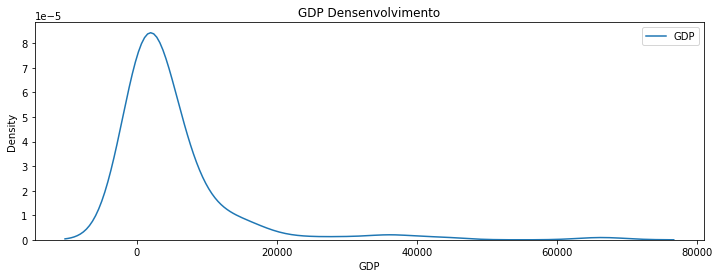

In [19]:
plt.figure(figsize=(12,4))
sns.kdeplot(desenvolvimento.GDP ,label='GDP')
plt.title('GDP Densenvolvimento')
plt.legend()
plt.show()


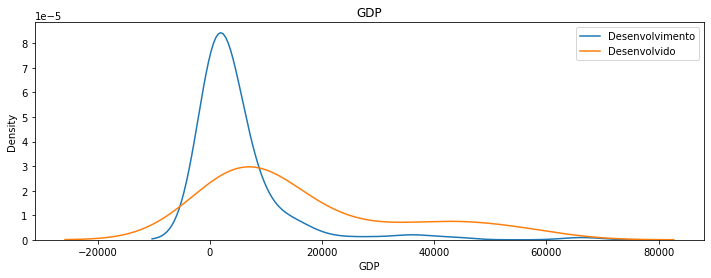

In [20]:
plt.figure(figsize=(12,4))
#sns.kdeplot(wine[wine.country == 'Brazil'].price,label='Brazil')
sns.kdeplot( WHO[WHO.Status == 'Developing' ].GDP ,label='Desenvolvimento')
sns.kdeplot( WHO[WHO.Status == 'Developed' ].GDP ,label='Desenvolvido')
plt.title('GDP')
plt.legend()
plt.show()





In [33]:
discrep = desenv[ (desenv.GDP >= -20000) & (desenv.GDP <= 10000) ]

print(discrep)
discrep.head()

discrep.loc[discrep.GDP.nsmallest(1).index][ [ 'Country', 'GDP', 'Status']]

                   Country  Year  ... Income composition of resources  Schooling
0              Afghanistan  2015  ...                           0.479       10.1
16                 Albania  2015  ...                           0.762       14.2
32                 Algeria  2015  ...                           0.743       14.4
48                  Angola  2015  ...                           0.531       11.4
96                 Armenia  2015  ...                           0.741       12.7
...                    ...   ...  ...                             ...        ...
2746  United Arab Emirates  2015  ...                           0.836       13.3
2826            Uzbekistan  2015  ...                           0.697       12.1
2842               Vanuatu  2015  ...                           0.598       10.8
2906                Zambia  2015  ...                           0.576       12.5
2922              Zimbabwe  2015  ...                           0.507       10.3

[112 rows x 22 columns]


,Country,GDP,Status
416,Burundi,33.681223,Developing


# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

In [18]:
# Seu código

desenvolvimento = WHO [ (WHO.Status == 'Developing') ]
desenvolvido = WHO [ (WHO.Status == 'Developed') ]



# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

In [ ]:
# Seu código

# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

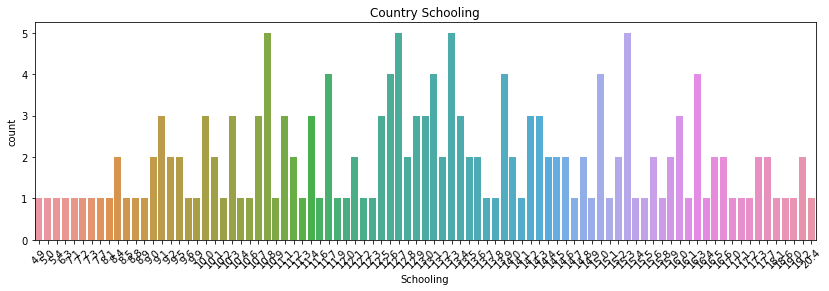

In [39]:
# Seu código
plt.figure(figsize=(14,4))
sns.countplot(x=WHO.Schooling)
plt.title('Country Schooling')
plt.xticks(rotation=45)
plt.show()

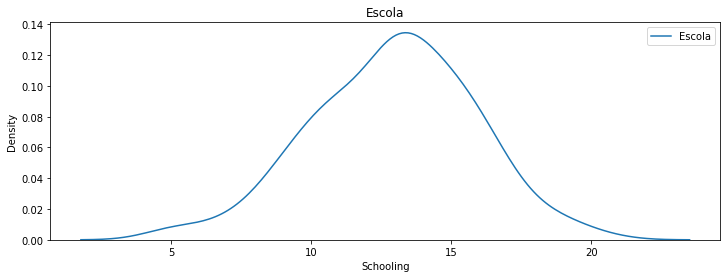

In [46]:
plt.figure(figsize=(12,4))
sns.kdeplot(WHO.Schooling, label='Escola')
sns.kdeplot(WHO[WHO.Country == 'Brasil'].Schooling, label='Brazil')
plt.title('Escola')
plt.legend()
plt.show()
